Using 'Quantity' and 'UnitPrice' for clustering.


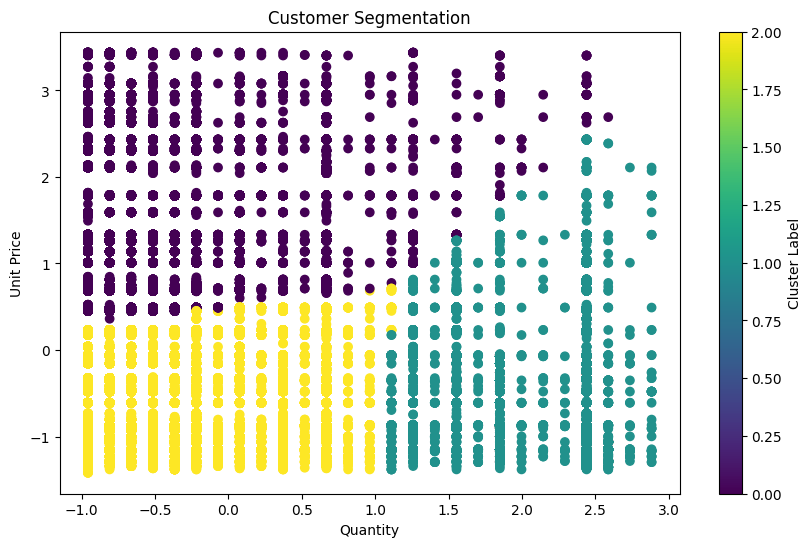

Quantity                                                    \
                   count      mean       std       min       25%       50%   
cluster_labels                                                               
0                93981.0 -0.547246  0.433689 -0.956598 -0.808904 -0.661211   
1                38320.0  2.245103  0.410361  1.111109  1.997270  2.440350   
2               205850.0 -0.168092  0.649767 -0.956598 -0.808904 -0.218131   

                                   UnitPrice                                \
                     75%       max     count      mean       std       min   
cluster_labels                                                               
0              -0.218131  2.588043   93981.0  1.344090  0.748954  0.361208   
1               2.440350  2.883430   38320.0 -0.710462  0.587887 -1.380154   
2               0.668029  1.111109  205850.0 -0.481389  0.414471 -1.418348   

                                                        
                     25%       50%       75%       max  
cluster_labels                                          
0               0.684881  1.254546  1.785371  3.436104  
1              -1.147109 -0.881697 -0.480342  2.432717  
2              -0.868750 -0.480342 -0.156669  0.710775


Summary of Customer Segments:

Cluster 0:
  Quantity - Mean: -0.55, Std Dev: 0.43, Median: -0.66
  Unit Price - Mean: 1.34, Std Dev: 0.75, Median: 1.25

Cluster 1:
  Quantity - Mean: 2.25, Std Dev: 0.41, Median: 2.44
  Unit Price - Mean: -0.71, Std Dev: 0.59, Median: -0.88

Cluster 2:
  Quantity - Mean: -0.17, Std Dev: 0.65, Median: -0.22
  Unit Price - Mean: -0.48, Std Dev: 0.41, Median: -0.48


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import io

# Load the dataset (replace with your file path if needed)
try:
    df = pd.read_csv('9. Customer Segmentation in E-commerce.csv')
except FileNotFoundError:
    print("Error: '9. Customer Segmentation in E-commerce.csv' not found.")
    # Handle the file not found error appropriately, e.g., provide alternative data loading
except Exception as e:
    print(f"An error occurred: {e}")

# Data Cleaning and Preprocessing
df.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing 'CustomerID'

# Outlier handling (using IQR method)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = handle_outliers(df, 'Quantity')  # Assuming 'Quantity' column exists
df = handle_outliers(df, 'UnitPrice')  # Assuming 'UnitPrice' column exists

# Data Consistency Checks
df = df[df['Quantity'] > 0]  # Remove rows with negative quantity
df = df[df['UnitPrice'] > 0]  # Remove rows with negative unit price

# Feature Selection and Scaling
# If 'Annual Income' and 'Spending Score' are not available, use alternatives
if 'Annual Income' not in df.columns or 'Spending Score' not in df.columns:
    print("Using 'Quantity' and 'UnitPrice' for clustering.")
    df_cluster = df[['Quantity', 'UnitPrice']].copy()
else:
    df_cluster = df[['Annual Income', 'Spending Score']].copy()

scaler = StandardScaler()
df_cluster[['Quantity', 'UnitPrice']] = scaler.fit_transform(
    df_cluster[['Quantity', 'UnitPrice']]
)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_cluster)
df_cluster['cluster_labels'] = kmeans.labels_

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cluster['Quantity'],
    df_cluster['UnitPrice'],
    c=df_cluster['cluster_labels'],
    cmap='viridis',
)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster Label')
plt.show()

# Cluster Analysis
grouped = df_cluster.groupby('cluster_labels')
descriptive_stats = grouped[['Quantity', 'UnitPrice']].describe()
display(descriptive_stats)

print("\nSummary of Customer Segments:")
for cluster_label, cluster_data in grouped:
    print(f"\nCluster {cluster_label}:")
    quantity_stats = cluster_data['Quantity'].describe()
    unit_price_stats = cluster_data['UnitPrice'].describe()
    print(
        f"  Quantity - Mean: {quantity_stats['mean']:.2f}, Std Dev:"
        f" {quantity_stats['std']:.2f}, Median: {quantity_stats['50%']:.2f}"
    )
    print(
        f"  Unit Price - Mean: {unit_price_stats['mean']:.2f}, Std Dev:"
        f" {unit_price_stats['std']:.2f}, Median: {unit_price_stats['50%']:.2f}"
    )